# Kidney Stone Segmentation Using U-Net and Fully Convolutional Networks

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.python.keras.backend import set_session
import os
import random
import numpy as np

#from keras_unet_collection import models
from tqdm import tqdm 

from PIL import Image
import cv2
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

2025-03-17 13:39:50.204635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-17 13:39:50.215217: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-17 13:39:50.218757: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-17 13:39:50.226574: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'tensorflow.keras'

## Parameters and Variable

In [2]:
#seeds = [13, 42, 1, 83, 76]
seeds = [13, 42]
np.random.seed = [0]

num_classes = 1
split_size = 0.2


IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 1

DATA_PATH = 'data/'

data_ids = next(os.walk(DATA_PATH+'/image'))[2]

X = np.zeros((len(data_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y = np.zeros((len(data_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR']= 'cuda_malloc_async'


## Read Dataset

In [3]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(data_ids), total=len(data_ids)):   
    path = DATA_PATH
    img = imread(path + '/image/' + id_)[:,:]
    img = img.reshape(img.shape[0], img.shape[1], IMG_CHANNELS)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X[n] = img  #Fill empty X_train with values from img
    
    mask = imread(path + 'label/' + id_)
    mask = (mask >= 250)
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
    y[n] = mask 
    #plt.axis("off")
    #imshow(y[n])
    #plt.show()

Resizing training images and masks


100%|█████████████████████████████████████████████████████████████████████████████████| 838/838 [00:18<00:00, 45.97it/s]


2024-11-06 12:43:31.214786: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [16, 16, 16]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 64


2024-11-06 12:43:31.335139: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06 12:43:31.335193: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06 12:43:31.338002: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06 12:43:31.338049: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06 12:43:31.338067: I external/local_xla/xla/stream_executor

----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_final_activation
Epoch 1/5


I0000 00:00:1730907820.757530   44768 service.cc:145] XLA service 0x7f6200013950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730907820.757596   44768 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-11-06 12:43:41.021504: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-06 12:43:43.956789: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1730907858.501327   44768 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/84 ━━━━━━━━━━━━━━━━━━━━ 88s 507ms/step - loss: 2.3035 - unet3plus_output_final_activation_accuracy: 0.8437 - unet3plus_output_final_activation_recall_final: 0.1478 - val_loss: 1.8796 - val_unet3plus_output_final_activation_accuracy: 0.9993 - val_unet3plus_output_final_activation_recall_final: 0.0000e+00
Epoch 2/5


/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - loss: 1.6417 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall_final: 0.0000e+00 - val_loss: 1.3900 - val_unet3plus_output_final_activation_accuracy: 0.9993 - val_unet3plus_output_final_activation_recall_final: 1.6718e-04
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - loss: 1.2249 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall_final: 0.0078 - val_loss: 0.8469 - val_unet3plus_output_final_activation_accuracy: 0.9993 - val_unet3plus_output_final_activation_recall_final: 0.0000e+00
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - loss: 0.8051 - unet3plus_output_final_activation_accuracy: 0.9995 - unet3plus_output_final_activation_recall_final: 0.1502 - val_loss: 0.7524 - val_unet3plus_output_final_activation_accuracy: 0.9995 - val_unet3plus_output_final_activation_recall_final: 0.2802
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - lo

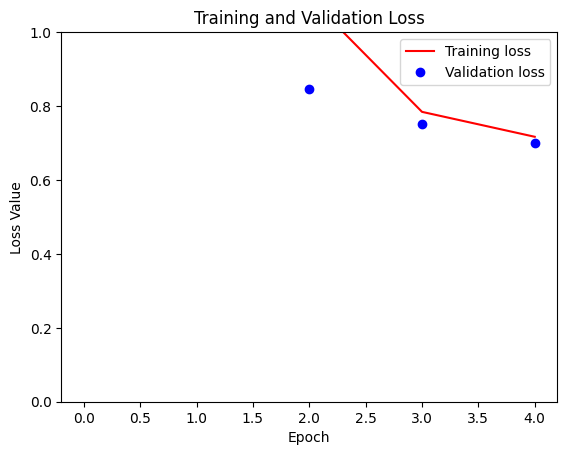

Accuracy: 0.997445787702288 +- 0.0006899068185194706
Jaccard: 0.03123280707025971 +- 0.04226624018140321
Dice: 0.0605737266233652 +- 0.07455634069670743
F1 Score: 0.057520472233342994 +- 0.07455634069670743
Precision: 0.04013949358443739 +- 0.05657963992023443
Recall: 0.15591105290753596 +- 0.15346598820924448


In [4]:

acc = []
jacc = []
f1 = []
prec = []
rec = []


for f in range(1, len(seeds)):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_size, random_state=seeds[f])
    
    y_train = {
        'unet3plus_output_sup0_activation': y_train,
        'unet3plus_output_sup1_activation': y_train,
        'unet3plus_output_sup2_activation': y_train,
        'unet3plus_output_final_activation': y_train
    }
    y_val = {
        'unet3plus_output_sup0_activation': y_val,
        'unet3plus_output_sup1_activation': y_val,
        'unet3plus_output_sup2_activation': y_val,
        'unet3plus_output_final_activation': y_val
    }


    model = models.unet_3plus_2d((512, 512, 1), n_labels=1, filter_num_down=[16, 32, 64, 128],
                             filter_num_skip='auto', filter_num_aggregate='auto',
                             stack_num_down=2, stack_num_up=1, activation='ReLU', output_activation='Sigmoid',
                             batch_norm=True, pool='max', unpool=False, deep_supervision=True, name='unet3plus')

    model.compile(
        optimizer='adam',
        loss={
            'unet3plus_output_sup0_activation': 'binary_crossentropy',
            'unet3plus_output_sup1_activation': 'binary_crossentropy',
            'unet3plus_output_sup2_activation': 'binary_crossentropy',
            'unet3plus_output_final_activation': 'binary_crossentropy'
        },
         metrics={
        'unet3plus_output_final_activation': ['accuracy', tf.keras.metrics.Recall(name='recall_final')]
        }
        )

    checkpoint_filepath = 'model_test' + str(f)+'fold.keras'
    callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='logs'),
            tf.keras.callbacks.ModelCheckpoint(
                filepath=checkpoint_filepath,
                save_weights_only=False,
                monitor='val_recall',
                mode='max',
                save_best_only=True,
                verbose=1)]
    
    model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=8, epochs=5, callbacks=callbacks)
    model.save('TesModelo1.keras')

    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']

    plt.figure()
    plt.plot( loss, 'r', label='Training loss')
    plt.plot( val_loss, 'bo', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()


    for i in range(0, len(X_val)):
        sample_image = X_val[i]
        sample_mask = y_val['unet3plus_output_final_activation'][i].astype(np.uint8).flatten()
        prediction = model.predict(sample_image[tf.newaxis, ...],verbose=0)[0]
        predicted_mask = (prediction > 0.5).astype(np.uint8).flatten()
            
        acc.append(accuracy_score(sample_mask, predicted_mask))
        jacc.append(jaccard_score(sample_mask, predicted_mask))
        f1.append(f1_score(sample_mask, predicted_mask))
        prec.append(precision_score(sample_mask, predicted_mask))
        rec.append(recall_score(sample_mask, predicted_mask))

    #del model
    tf.keras.backend.clear_session()

    f+=1
    
    jacc = np.array(jacc)

    print(f"Accuracy: {np.mean(acc)} +- {np.std(acc)}")
    print(f"Jaccard: {np.mean(jacc)} +- {np.std(jacc)}")
    print(f"Dice: {(2*np.mean(jacc))/(1+np.mean(jacc))} +- {np.std(2*jacc/(1+jacc))}")
    print(f"F1 Score: {np.mean(f1)} +- {np.std(f1)}")
    print(f"Precision: {np.mean(prec)} +- {np.std(prec)}")
    print(f"Recall: {np.mean(rec)} +- {np.std(rec)}")

In [5]:
jacc = np.array(jacc)

print(f"Accuracy: {np.mean(acc)} +- {np.std(acc)}")
print(f"Jaccard: {np.mean(jacc)} +- {np.std(jacc)}")
print(f"Dice: {(2*np.mean(jacc))/(1+np.mean(jacc))} +- {np.std(2*jacc/(1+jacc))}")
print(f"F1 Score: {np.mean(f1)} +- {np.std(f1)}")
print(f"Precision: {np.mean(prec)} +- {np.std(prec)}")
print(f"Recall: {np.mean(rec)} +- {np.std(rec)}")

Accuracy: 0.997445787702288 +- 0.0006899068185194706
Jaccard: 0.03123280707025971 +- 0.04226624018140321
Dice: 0.0605737266233652 +- 0.07455634069670743
F1 Score: 0.057520472233342994 +- 0.07455634069670743
Precision: 0.04013949358443739 +- 0.05657963992023443
Recall: 0.15591105290753596 +- 0.15346598820924448


In [6]:
import tensorflow as tf
#best_model = tf.keras.models.load_model('model_1fold.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


ValueError: Expected image array to have rank 3 (single image). Got array with shape: (1, 512, 512, 1)

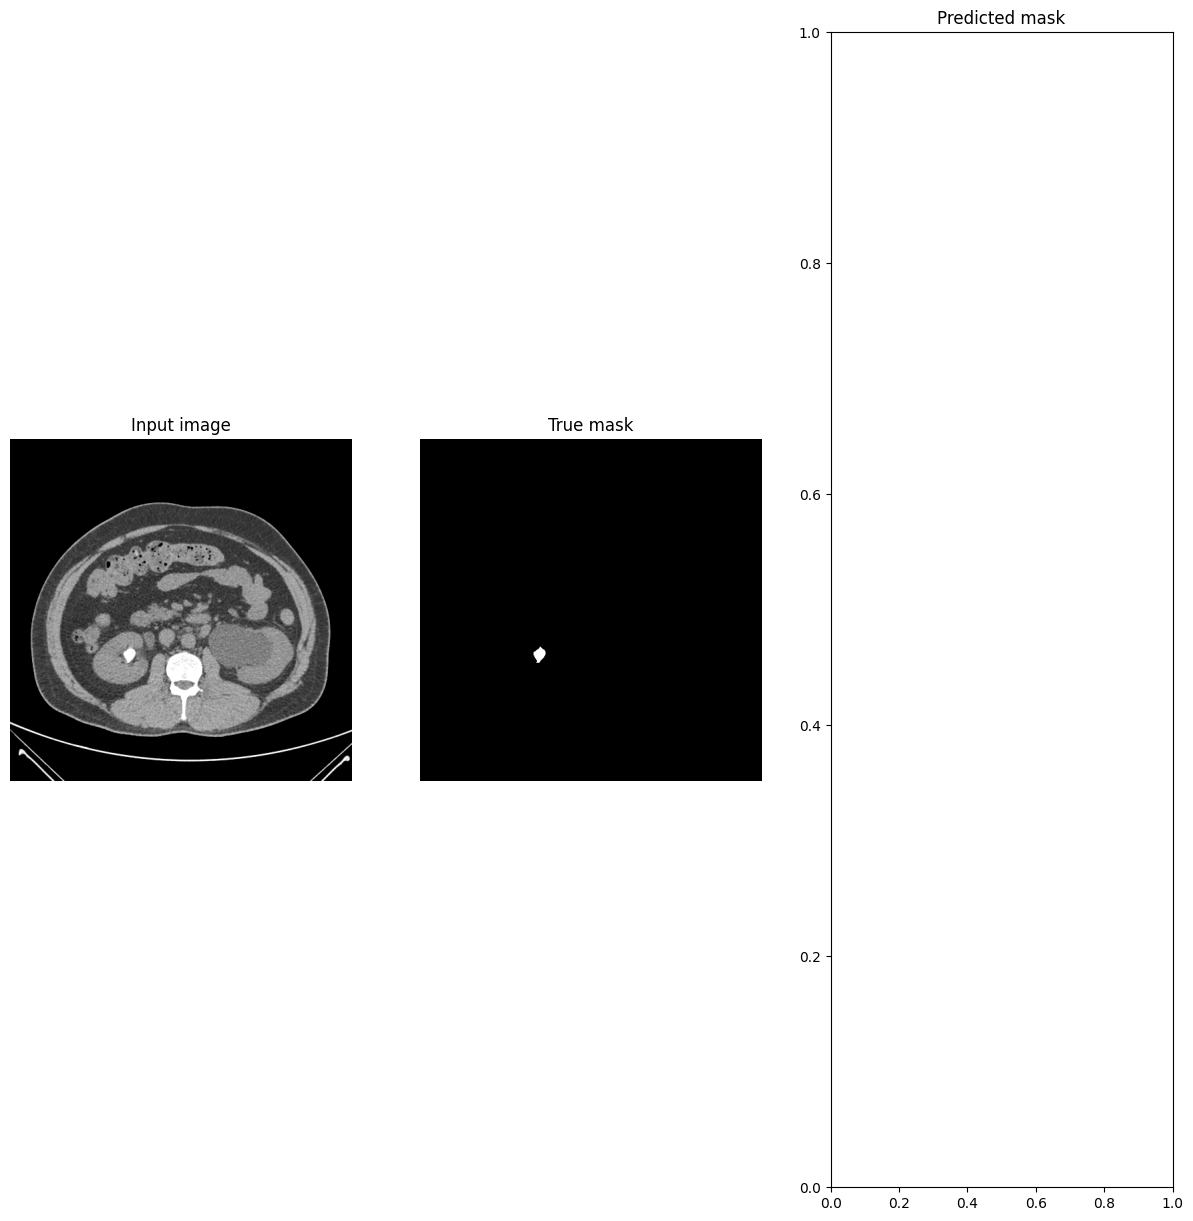

In [7]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input image', 'True mask', 'Predicted mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]), cmap='gray')
    plt.axis('off')
  plt.show()
  
i = random.randint(0, len(X_val) - 1)
sample_image = X_val[i]
sample_mask = y_val['unet3plus_output_final_activation'][i]
prediction = model.predict(sample_image[tf.newaxis, ...])[0]
predicted_mask = (prediction > 0.5).astype(np.uint8)
display([sample_image, sample_mask,predicted_mask])

sample_mask = y_val['unet3plus_output_final_activation'][i].astype(np.uint8).flatten()
predicted_mask = predicted_mask.flatten()


print("Accuracy: "+ str(accuracy_score(sample_mask, predicted_mask)))
print("Jaccard: "+ str(jaccard_score(sample_mask, predicted_mask)))
print("Dice: "+ str((2*jaccard_score(sample_mask, predicted_mask))/(1+jaccard_score(sample_mask, predicted_mask))))
print("Precision: "+ str(precision_score(sample_mask, predicted_mask)))
print("Recall: "+ str(recall_score(sample_mask, predicted_mask)))

Acuraccy:  0.9998064804077148
Jaccard:  0.7504550150031974
F1 Score:  0.8574399325558522
Precision:  0.9923892538866844
Recall:  0.7547991292301603